In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Linear regression single feature

In [188]:
#linear regression with one feature
df = pd.read_csv("house price single.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


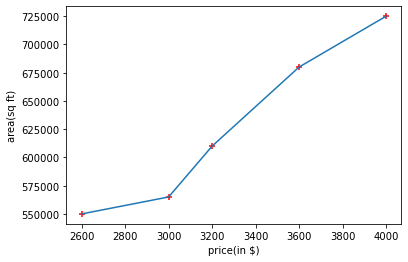

In [189]:
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,df.price)
plt.xlabel("price(in $)")
plt.ylabel("area(sq ft)")
plt.show()

In [190]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [191]:
reg.fit(df[["area"]],df.price)
#or reg.fit(np.array(df[["area"]]),df.price)

LinearRegression()

In [208]:
df2 = pd.DataFrame(np.array([4000,5000,6000]), columns=["area"])
df2

,area
0,4000
1,5000
2,6000


In [196]:
#reg.predict(np.array([4000,5000,6000]).reshape(3,1))
#df2 = pd.DataFrame(np.array([4000,5000,6000]), columns=["area"])
reg.predict(df2)
#can also give reg.predict([(4000,),(5000,),(6000,)])

array([723767.12328767, 859554.79452055, 995342.46575342])

In [202]:
#coefficient and intercept of regression model
#type(reg.coef_) is ndarray
print(reg.coef_, reg.intercept_)

[135.78767123] 180616.43835616432


C:\Users\ram11\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


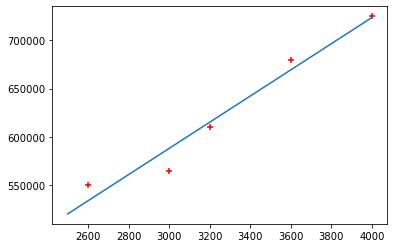

In [203]:
plt.scatter(df.area,df.price,color="red",marker="+")
#plt.plot(df.area,df.price)
plt.plot(np.array([2500,3500,4000]), reg.predict(np.array([2500,3500,4000]).reshape(3,1)))

# Multiple linear regression

In [204]:
df = pd.read_csv("1000_Companies.csv")

In [205]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

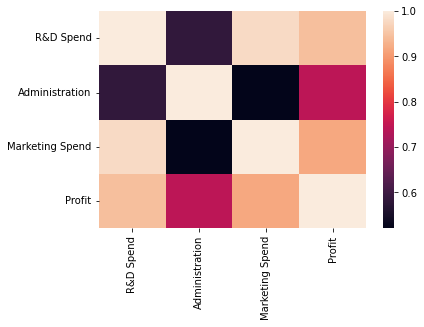

In [206]:
sns.heatmap(df.corr())

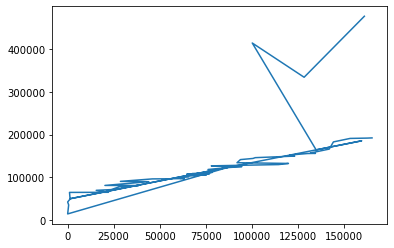

In [211]:
#inspect the relation between profit and
plt.plot(df["R&D Spend"],df["Profit"])

C:\Users\ram11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

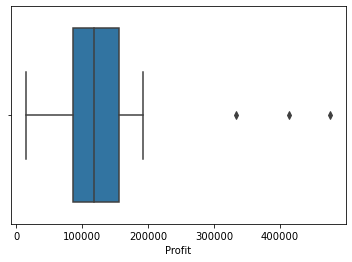

In [212]:
#there are some outlier in the datasets
#identfy those
sns.boxplot(df["Profit"])

In [213]:
#3 outliers are there
#inter quantile range
iqr = 1.5*(df["Profit"].quantile(0.75) - df["Profit"].quantile(0.25))
iqr

104450.86332374999

In [218]:
df[(df["Profit"]>iqr_max) | (df["Profit"]<iqr_min)]
#3 outliers are following:

,R&D Spend,Administration,Marketing Spend,State,Profit
997,100275.47,241926.31,227142.82,California,413956.48
998,128456.23,321652.14,281692.32,California,333962.19
999,161181.72,270939.86,295442.17,New York,476485.43


In [221]:
iqr_max = iqr + df["Profit"].quantile(0.75) #upper valuer
iqr_min = df["Profit"].quantile(0.25) - iqr #lower value
#df[df["Profit"]<iqr_m]

df1 = df[(df["Profit"]<iqr_max) & (df["Profit"]>iqr_min)]
#df1 contain the data without outliers

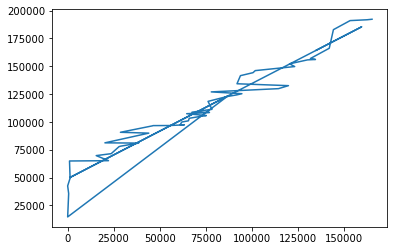

In [222]:
plt.plot(df1["R&D Spend"],df1["Profit"])
#now data is something relatable

In [231]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [232]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df_trans = df1.copy()
df_trans["State"] = label_encoder.fit_transform(df1.iloc[:,3])
df_trans.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [240]:
x = df_trans.iloc[:,:4]
y = df_trans.iloc[:,4]

In [243]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20, random_state=42)

In [244]:
reg = sklearn.linear_model.LinearRegression().fit(x_train, y_train)
reg

LinearRegression()

In [246]:
reg.intercept_, reg.coef_

(49789.90157051642,
 array([ 0.7995    , -0.02582262,  0.03030629,  5.50334204]))

In [250]:
reg.predict(x_test)

array([ 85513.57603439, 154157.3910817 ,  61386.42720795, 100674.95982041,
       163120.97200599, 176314.46289501,  95136.09459071, 175741.3198799 ,
       174966.59452213,  71703.47727481, 102105.20615666, 106846.28364163,
        71769.15035782,  60407.08122606,  88731.96278241,  82468.48684328,
       170446.26932091,  65082.76656791, 103887.46485884, 117679.62620899,
       113971.60951142, 107901.93102458,  57457.27985983,  82219.44977073,
       159225.61279266, 169537.53788472, 155497.19362659,  90158.41410316,
       168228.86355995,  91778.38193555, 181898.12293962,  96775.70816212,
        77658.22219743, 181921.56369671, 134256.25976926, 109989.50409274,
       126982.21220533,  88643.12988555,  65252.74489815,  57535.00864421,
        65216.87007367,  51902.28297293, 159210.6162337 , 172913.56632247,
        94048.36740393, 173982.97772924, 117278.92658318, 107974.63226287,
       162711.44981709,  86085.01072856, 157563.8884262 ,  54965.68794573,
       140264.53598863, 1

In [254]:
sklearn.metrics.r2_score(y_test,reg.predict(x_test))

0.9995180348115865